In [1]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
import nltk

In [3]:
all_files = glob.glob("./data_list2/my*.xls")

In [4]:
all_files

['./data_list2\\myCabinetExcelData (1).xls',
 './data_list2\\myCabinetExcelData (2).xls',
 './data_list2\\myCabinetExcelData (3).xls',
 './data_list2\\myCabinetExcelData (4).xls',
 './data_list2\\myCabinetExcelData (5).xls',
 './data_list2\\myCabinetExcelData (6).xls',
 './data_list2\\myCabinetExcelData (7).xls',
 './data_list2\\myCabinetExcelData (8).xls',
 './data_list2\\myCabinetExcelData (9).xls',
 './data_list2\\myCabinetExcelData.xls']

In [5]:
all_files_data=[]

In [6]:
for file in all_files:
    data_frame =pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Le gout de pomme de terre du cafe Arabica au B...,"Bouyjou, B.",ASIC ASSOCIATION SCIENTIFIQUE INTERNATIONALE,1993
1,NaN,2,Piegeage de masse du scolyte du cafe Hypothene...,"Dufour, B.",unknown,1999
2,NaN,3,<< Facteurs de confusion >> dans les etudes ep...,"Ducimetiere, P.",ASIC ASSOCIATION SCIENTIFIQUE INTERNATIONALE,1993
3,NaN,4,Impact of Heart Rate on Central Aortic Pressur...,"Williams, B.; Lacy, P.S.; CAFE and the ASCOT (...",Elsevier Science,2009
4,NaN,5,Cafe> Nostalgia Corner Cafe>s are a familiar ...,"Welz, Adam",unknown,2000
5,NaN,6,Cafe> Nostalgia Corner Cafe>s are a familiar ...,"Welz, Adam",unknown,2000
6,NaN,7,"CAFE PARADISE ""(Café Paradis)""",UNKNOWN,British Film Institute.,1955
7,NaN,8,Cafe> Nostalgia Corner Cafe>s are a familiar ...,"Welz, Adam",unknown,2000
8,NaN,9,Cafe-Galerie Espai Cafe in Olot,MSB Estudi taller d arquitectura i disseny,INSTITUT FUER INTERNATIONALE,2012
9,NaN,10,Atomic Cafe? Symantec is lining up as the late...,unknown,unknown,1997


In [7]:
all_files_data_concat=pd.concat(all_files_data,axis=0,ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Le gout de pomme de terre du cafe Arabica au B...,"Bouyjou, B.",ASIC ASSOCIATION SCIENTIFIQUE INTERNATIONALE,1993
1,NaN,2,Piegeage de masse du scolyte du cafe Hypothene...,"Dufour, B.",unknown,1999
2,NaN,3,<< Facteurs de confusion >> dans les etudes ep...,"Ducimetiere, P.",ASIC ASSOCIATION SCIENTIFIQUE INTERNATIONALE,1993
3,NaN,4,Impact of Heart Rate on Central Aortic Pressur...,"Williams, B.; Lacy, P.S.; CAFE and the ASCOT (...",Elsevier Science,2009
4,NaN,5,Cafe> Nostalgia Corner Cafe>s are a familiar ...,"Welz, Adam",unknown,2000
...,...,...,...,...,...,...
95,NaN,6,Etude des changements chimiques dans le cafe s...,"Severini, C.",ASIC ASSOCIATION SCIENTIFIQUE INTERNATIONALE,1993
96,NaN,7,Analisis por MEB de la porosidad del cafe tostado,"Gutierrez, C.",ASIC ASSOCIATION SCIENTIFIQUE INTERNATIONALE,1993
97,NaN,8,Vers la diversification de la qualite du cafe ...,"Rabemiafara, A.",ASIC ASSOCIATION SCIENTIFIQUE INTERNATIONALE,1997
98,NaN,9,Utilisation d'un piege a attractif kairomonal ...,"Brun, L. O.",ASIC ASSOCIATION SCIENTIFIQUE INTERNATIONALE,1997


In [8]:
all_title = all_files_data_concat['제목']
all_title

0     Le gout de pomme de terre du cafe Arabica au B...
1     Piegeage de masse du scolyte du cafe Hypothene...
2     << Facteurs de confusion >> dans les etudes ep...
3     Impact of Heart Rate on Central Aortic Pressur...
4     Cafe> Nostalgia  Corner Cafe>s are a familiar ...
                            ...                        
95    Etude des changements chimiques dans le cafe s...
96    Analisis por MEB de la porosidad del cafe tostado
97    Vers la diversification de la qualite du cafe ...
98    Utilisation d'un piege a attractif kairomonal ...
99    Traitement des eaux residuaires d'usines de tr...
Name: 제목, Length: 100, dtype: object

In [9]:
stopWords= set(stopwords.words('english'))
lemma= WordNetLemmatizer()

In [10]:
words= []
for title in all_title:
    # print(title)
    EnWords =re.sub(r"[^a-zA-Z]+"," ",str(title)) # [^a-zA-Z] 소문자부터 대문자까지 다포함해라
    # print(EnWords)
    EnWordsToken = word_tokenize(EnWords.lower()) # 여기서 word_tokenize로 리스트가 되기때문에 밑에도 리스트를해줘야한다.
    # print(EnWordsToken)
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # 이름이 없는 함수 익명함수,클로저
    # print(EnWordsTokenStop)
    EnWordsTokenStopLemma= [lemma.lemmatize(w) for w in EnWordsTokenStop]
    # print(EnWordsTokenStopLemma)
    words.append(EnWordsTokenStopLemma)

In [11]:
words2 =reduce(lambda x, y:x+y, words) # reduce함수는 누적시켜주는역활 

In [12]:
count =Counter(words2)

In [13]:
count.most_common(10)

[('cafe', 112),
 ('de', 28),
 ('du', 14),
 ('la', 13),
 ('au', 12),
 ('le', 11),
 ('lait', 10),
 ('dans', 5),
 ('macule', 5),
 ('tool', 5)]

In [17]:
word_count = dict()

for tag, counts in count.most_common(50): # 튜블이기때문에 키 벨류가있어서 tag 를써서 불러온다.
    if(len(str(tag))>2): # 데그에 길이체크 한글자 같은거 거를려고
        word_count[tag] = counts
print(word_count)

{'cafe': 112, 'lait': 10, 'dans': 5, 'macule': 5, 'tool': 5, 'environment': 5, 'package': 4, 'application': 4, 'china': 4, 'sur': 3, 'impact': 3, 'pressure': 3, 'analysis': 3, 'study': 3, 'nostalgia': 3, 'corner': 3, 'familiar': 3, 'sight': 3, 'every': 3, 'south': 3, 'african': 3, 'town': 3, 'city': 3, 'soon': 3, 'may': 3, 'memory': 3, 'photographic': 3, 'essay': 3, 'document': 3, 'disappear': 3, 'entirely': 3, 'magnetic': 3, 'spot': 3, 'gene': 3, 'computational': 3, 'fire': 3, 'solar': 3, 'energy': 3, 'based': 3, 'cloud': 3, 'pour': 3}


In [18]:
del word_count['cafe']

In [19]:
key_list = list(word_count.keys())
sorted_keys_list =sorted(key_list)

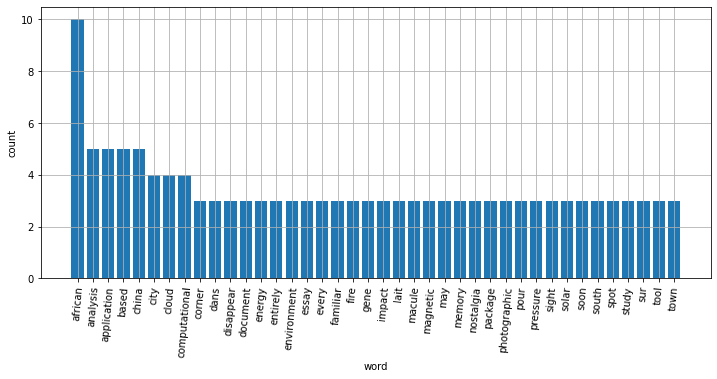

In [20]:
plt.figure(figsize=(12,5))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)

sorted_keys =sorted_keys_list
sorted_values = sorted(word_count.values(),reverse=True)
plt.bar(range(len(word_count)),sorted_values,align='center')
plt.xticks(range(len(word_count)),list(sorted_keys) ,rotation='85')
plt.show()